# Data 전처리(Data Preprocessing)란

-   모델링 전에 데이터를 미리 조정하는 거~~~
-   데이터 분석이나 머신러닝 모델에 적합한 형태로 데이터셋을 변환 또는 조정하는 과정을 말한다.
-   데이터 분석, 머신러닝 모델링 전에 수행하는 작업이다.
-   Garbage in, Garbage out.
    -   좋은 dataset으로 학습 해야 좋은 예측 결과를 만드는 모델을 학습할 수 있다.
    -   좋은 train dataset을 만드는 것은 모델의 성능에 가장 큰 영향을 준다.
-   Data 전처리에는 다음과 같은 작업이 있다.
    -   **Data Cleaning (데이터 정제)**
        -   데이터셋에 있는 오류값, 불필요한 값, 결측치, 중복값 등을 제거하는 작업
    -   **컬럼 선택 및 파생변수 생성**
        -   컬럼들 중 분석에 필요한 컬럼들만 선택하거나 기존 컬럼들을 계산한 결과값을 가지는 파생변수를 생성한다.
    -   **Feature의 데이터 타입별 변환**
        -   문자열을 날짜 타입으로 변환, 범주형을 수치형으로 변환등과 같이 원래 데이터의 형식에 맞게 변환하는 작업.
        -   **수치형 데이터 Feature Scaling**
            -   수치형 컬럼들의 scale(척도) 를 맞춰 주는 작업.
        -   **범주형 데이터 인코딩**
            -   문자열 형태로 되어있는 범주형 데이터를 숫자 형태로 변경하는 작업.


# 결측치(Missing Value) 처리

-   결측치(Missing Value)
    -   수집하지 못한 값. 모르는 값. 없는 값
    -   결측치 값은 `NA, NaN, None, null` 로 표현한다. (언어마다 차이가 있다.)
-   결측치는 데이터 분석이나 머신러닝 모델링 전의 데이터 전처리 과정에서 처리해줘야 한다.


(정리)
- 데이터셋에서 **결측치가 어떤 의미인가 파악**하는 것이 필요하다. 결측치는 '실제로 없는 값'일 수도 있고, '실제로 있는데 수집하지 못한 값'일 수도 있다.
- 따라서, **[1]적절히 채워주거나 [2]지워주는** 처리를 해줘야 한다.

### 결측치 처리 방법

결측치를 처리하기 전에 **"이 값이 기록되지 않아서 누락된 것인가, 아니면 존재하지 않아서 누락된 것인가?"** 를 확인해야 한다.  
존재하지 않아서 누락된 값이라면 이것은 어떤 값일까 추측할 필요 없이 결측치로 유지하면 되지만  
값이 기록되지 않아서(수집하지 못해서) 누락된 경우는 해당 열과 행의 다른 값을 기반으로 값이 무엇이었을지 추측해 볼 수 있다


- #### 결측치 삭제(Complete Case Analysis):
- 행을 날리거나 열을 날린다. 1차원 단위로 삭제한다. 
    -   리스트와이즈 삭제(Listwise Deletion)
        -   결측치가 있는 행들을 삭제한다.
        -   수집한 데이터도 같이 삭제되는 단점이 있다.
        -   데이터가 충분히 크고 결측치가 많지 않을 때 적합하다.
    -   컬럼 삭제 (Drop column)
        -   컬럼자체에 결측차가 너무 많을 경우 컬럼을 제거할 수도 있다.

In [ ]:
import pandas as pd
import numpy as np
data = {
    "name":['김영희', '이명수', '박진우', '이수영', '오영미'],
    "age": [23, 18, 25, 32, np.nan], 
    "weight":[np.nan, 80, np.nan, 57, 48]
}
df = pd.DataFrame(data)
df

In [ ]:
# 결측치 확인 - 전체
df.isna().sum() # 컬럼별 결측치 개수

In [ ]:
## 결측치 값 확인
import numpy as np
print(pd.isna(None))
print(pd.isna(np.nan))
print(np.nan == None)
print(np.nan == np.nan)

3, 4번 코드: **결측치 = 모르는 값**이다! 따라서 비교를 할 때 모르는 값을 가지고 비교를 하니 False가 나오는 거

In [ ]:
# 제거 - 행단위(리스트와즈, 0축 기준 제거: default)
df.dropna()

In [ ]:
# 컬럼단위 (1축 기준 삭제)
df.dropna(axis=1)

#### 2. 결측치 대체(imputation)

결측치가 수집하지 못해 누락된 경우 그 값일 가능성이 가장 높은 값으로 대체할 수 있다.  
대체할 값으로 일정한 값을 사용하는 경우와 분석을 통해 찾는 방법이 있다.

-   **평균/중앙값/최빈값 대체**
    -   수치형 변수의 경우 평균이나 중앙값으로, 범주형 변수의 경우 최빈값으로 결측치를 대체한다.
    -   **평균으로 대체** - 수치형 컬럼으로 outlier(극단치)의 영향을 받지 않는 모델이거나 컬럼의 데이터들이 **정규 분포를 따르거나 outlier(극단치)가 없는 경우** 적합.
    -   **중앙값으로 대체**
        -   수치형 컬럼으로 outlier(극단치)가 존재하거나 데이터 분포가 비대칭인 컬럼의 결측치 대체에 적합.
        -   보통 평균보다 중앙값을 사용한다.
    -   **최빈값으로 대체**
        -   범주형 컬럼의 경우 대푯값인 최빈값으로 대체한다.
    
-   **모델링 기반 대체**
    -   결측치가 있는 컬럼을 output(종속변수)으로 결측치가 없는 행들(독립변수)을 input으로 하여 **결측치를 예측하는 모델**을 정의한다.
    -   **K-최근접 이웃(K-NN) 대체**
        -   결측치가 있는 데이터 포인트와 가장 가까운 K개의 데이터 포인트를 찾아, 그 값들의 평균(수치형 데이터)이나 최빈값(범주형 데이터)으로 결측치를 대체한다.
-   **결측치를 표현하는 값으로 대체**
    -   예를 들어 나이컬럼의 nan을 -1, 혈액형의 nan을 "없음" 등과 같이 그 컬럼이 가질 수없는 값을 nan 대신 사용한다.
-   #### 다중 대체 (multiple imputation)
    -   여러 방식으로 결측치를 대체한 데이터셋을 만든다. 각 데이터셋마다 분석하고 추론한 뒤 그 결과들을 합쳐서 최종 결론을 낸다.


In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame([
        [0.1, 2.2, np.nan],
        [0.3, 4.1, 1], 
        [np.nan, 6, 1],
        [0.08, np.nan, 2],
        [0.12, 2.4, 1],
        [np.nan, 1.1, 3]
    ], columns=['A', 'B', 'C']
)
org = df.copy()

In [ ]:
df

In [ ]:
# 컬럼별(속성) 처리.
### 평균 대체
df['A']  = df['A'].fillna(df['A'].mean())
df

In [ ]:
### 중앙값
df['B'] = df['B'].fillna(df['B'].median())
df

In [ ]:
df['C'].mode()[0]

In [ ]:
### 최빈값(범주형)
df['C'] = df['C'].fillna(df['C'].mode()[0])  # mode(): Series를 반환.
df

In [ ]:
df = org.copy()
df

## scikit-learn 전처리기 이용한 대체

### SimpleImputer

- **SimpleImputer**는 결측값을 대체하는 데 사용되는 전처리 클래스로  결측값을 평균, 중앙값, 최빈값 으로 대체한다.
- **메소드**
  - **initializer** 파라미터
    - **strategy**: 어떤 값으로 대체할지 지정. "median": 중앙값, "mean": 평균, "most_frequent": 최빈값, "constant": 상수(fill_value=채울값) 중 하나 사용.
  
  
### KNNImputer
- KNN(K-최근접 이웃(K-Nearest Neighbors) **머신러닝 알고리즘을 이용해 결측치를 추정해서 대체**한다.
- 결측값이 있는 샘플의 최근접 이웃을 찾아 그 이웃들의 값을 평균내어 결측값을 대체한다.

#### 공통 메소드(모든 전처리기의 공통)
- fit()
  - 변환할 때 필요한 값들을 찾아서 instance변수에 저장. (컬럼별 평균, 중앙값)
- transform()
  - fit에서 찾은 값을 이용해 결측치를 대체한다.
- fit_transform() : fit(), transform()을 순서대로 한번에 처리.

In [2]:
# df['C']# .to_frame()

In [ ]:
########################################################
# SimpleImputer 예제
########################################################
df = org.copy()

from sklearn.impute import SimpleImputer
# A, B (수치형) => 중앙값, C(범주형) => 최빈값
imputer1 = SimpleImputer(strategy="median")
imputer2 = SimpleImputer(strategy="most_frequent")

imputer1.fit(df[['A', 'B']])  # 결측치를 어떤 값으로 바꿀지 학습. (2차원 -> 0축 기준으로 계산)
result1 = imputer1.transform(df[['A', 'B']])  # 변환작업 (fit에서 찾은 중앙값으로 결측치를 대체)

result2 = imputer2.fit_transform(df['C'].to_frame()) #series.to_frame() : Series->DataFrame
# fit/transform 을 순서대로 실행. fit/transform을 같은 데이터셋으로 할 경우 사용.

# result1, result2 하나로 합치기.
## ndarray 합치는 함수: np.concatenate([대상 배열들], axis=합칠방향(default: 0))
result = np.concatenate([result1, result2], axis=1)
print(result.shape)
result

In [ ]:
result1.shape, result2.shape

In [ ]:
########################################################
# KNNImputer 예제
########################################################
df = org.copy()
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)  # K - 가까운 데이터포인트 몇개를 확인 할지.
result = imputer.fit_transform(df)
# imputer.fit(df) -> imputer.transform(df)
print(result)

# 이상치(Outlier) 처리

-   데이터 집합에서 다른 관측치들과 크게 다른 값을 가지는 데이터 포인트를 말한다.
    -   잘못된 값이나 극단치가 있다.
-   이상치가 생기는 원인은 데이터 수집과정에서의 문제, 측정 오류, 극단적 변이가 반영된 값(엄청 튀는 값)이 수집된 경우 등이 있다.
-   이상치는 이상치들은 일반적인 경향에서 벗어난 값이므로 **정확하게 식별하고 처리하는 것이 분석의 정확성과 신뢰성을 높이는데 중요하다.**


## 분포에서 벗어난 이상치(Outlier) 식별

-   통계적 기준과 도메인 기준이 있다.

### 통계적 기준

-   **표준편차 기준**
    -   데이터가 **정규분포**를 따른다고 가정할 때 평균으로 부터 _k_ 표준편차 범위 밖으로 떨어진 데이터 포인트를 outlier 로 판단한다.

\begin{align}
&정상범위\,값: \mu - k \times \sigma \ \leq value \leq \mu + k \times \sigma \\
&\mu: 평균,\, \sigma: 표준편차
\end{align}

-   **분위수 기준**
    -   IQR(Inter quantile Range) 을 이용해 Outlier 여부를 찾는다.
    -   1분위, 3분위 에서 IQR \* 1.5 보다 더 떨어진 값을 outlier로 판단한다. 단 정상 범위를 조정하려고 할때는 1.5값을 변경할 수 있다.

\begin{align}
&IQR = 3분위 - 1분위 \\
&정상범위\,값:  (1분위 - 1.5\times IQR) \leq value \leq  (3분위 + 1.5\times IQR)
\end{align}

-   **극단치(분포에서 벗어난 값) 처리** 
    -   정상적이 값이지만 다른 값들과 다른 패턴을 가지는 값.
    -   일반적으로 극단적으로 크거나 작은 값
    -   처리
        1. 제거한다.
            - 결측치로 대체 하거나 데이터 포인트(행)를 제거한다.
            - outlier가 분석 결과에 부정적 영항을 미치는 경우.
            - outlier값이 대상 집단을 대표하지 않는다고 판단할 경우 .
            - 명확히 잘못수집 된 오류값일 경우
        1. 윈저화 (Winsorization)
            - 최소값과 최값을 정해 놓고 그 범위를 넘어서는 작은 값은 최소값으로 범위를 넘어서 큰 값은 최대값으로 대체한다.
        1. 대체 (Imputation)
            - 평균, 중앙값, 최빈값 등으로 대체한다.


In [ ]:
import pandas as pd
import numpy as np
np.random.seed(0)

df = pd.DataFrame(np.random.normal(10, 2, size=(10, 3)), columns=['a', 'b', 'c'])
df.iloc[[0, 3], [0, 2]] = [[100, 200],[300,-100]]
df

In [ ]:
import matplotlib.pyplot as plt

# Boxplot을 이용해 이상치 확인
df.boxplot()
plt.title('Boxplot')
plt.show()

In [ ]:
####################################################################
# # 4 분위수 기준으로 outlier를 찾기(식별)
# 1. "1분위(100분위기준 25분위), 3분위(100분위 기준 75분위)" 계산.
# 2. "IQR(Inter Quartile Range) = 3분위수 - 1분위수" 계산
# 3. "정상범위: v < 1분위값 - 1.5*iqr, v > 3분위 + 1.5*iqr" 조건으로 outlier를 찾기
####################################################################
# "a" 컬럼에서 outlier를 찾기
q1, q3 = df['a'].quantile(q=[0.25, 0.75])
iqr = q3 - q1
whis = 1.5
iqr = iqr * whis
df['a'][~df['a'].between(q1 - iqr, q3 + iqr)]  #series boolean indexing
df.loc[~df['a'].between(q1 - iqr, q3 + iqr)]

In [ ]:
# 함수화 하기.
def find_outliers(df, column_name, whis=1.5):
    """
    분위수 기준으로 이상치를 찾는 함수

    Args:
        df (pd.DataFrame): 데이터프레임
        column_name (str): 이상치를 찾을 컬럼명

    Returns:
        pd.Series: 이상치 값들
    """
    q1, q3 = df[column_name].quantile(q=[0.25, 0.75])
    iqr = q3 - q1
    iqr *= whis

    return df.loc[~df[column_name].between(q1 - iqr, q3 + iqr), column_name]

# Feature 타입 별 전처리

## Feature(변수)의 타입

-   **범주형(Categorical) 변수**
    -   범주를 구분하는 이름을 가지는 변수.
        -   **범주(範疇)** 의미: 동일한 성질을 가진 부류나 범위
        -   각 값 사이에 값이 없는 이산적 특징을 가진다.
        -   값이 될 수있는 값들이 정해져 있다.
    -   **명목(Norminal) 변수/비서열(Unordered) 변수**
        -   범주에 속한 값간에 서열(순위)가 없는 변수
        -   성별, 혈액형, 지역
    -   **순위(Ordinal) 변수/서열(Ordered) 변수**
        -   범주에 속한 값 간에 서열(순위)가 있는 변수
        -   성적, 직급, 만족도
-   **수치형(Numeric) 변수**
    -   수량을 표현하는 값들을 가지는 변수.
    -   **이산형(Discrete) 변수**
        -   수치를 표현하지만 소수점의 형태로 표현되지 못하는 데이터. 정수형 값들을 가진다.
        -   예) 하루 방문 고객수, 가격(원화), 물건의 개수
    -   **연속형(Continuous) 변수**
        -   수치를 표현하며 소수점으로 표현가능한 데이터. 실수형 값들을 가진다.
        -   예) 키, 몸무게, 시간


## 범주형 데이터 전처리

-   Scikit-learn의 머신러닝 API들은 Feature나 Label의 값들이 숫자(정수/실수)인 것만 처리할 수 있다.
-   문자열(str)일 경우 숫자 형으로 변환해야 한다.
    -   **범주형 변수의 경우** 전처리를 통해 정수값으로 변환한다.
    -   범주형이 아닌 **단순 문자열인** 경우 일반적으로 제거한다.


### 범주형 Feature의 처리

-   Label Encoding
-   One-Hot Encoding


### 레이블 인코딩(Label encoding)

-   범주형 Feature의 고유값들 오름차순 정렬 후 0 부터 1씩 증가하는 값으로 변환
-   **숫자의 크기의 차이가 모델에 영향을 주지 않는 트리 계열 모델(의사결정나무, 랜덤포레스트)에 적용한다.**
-   **숫자의 크기의 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱회귀, SVM, 신경망)에는 사용하면 안된다.**

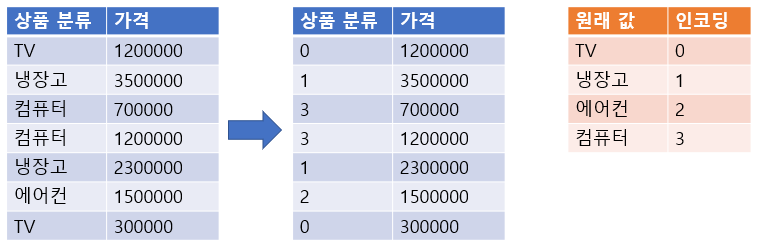


-   **sklearn.preprocessing.LabelEncoder** 사용
    -   fit(): 어떻게 변환할 지 학습
    -   transform(): 문자열를 숫자로 변환
    -   fit_transform(): 학습과 변환을 한번에 처리
    -   inverse_transform():숫자를 문자열로 변환
    -   classes\_ : 인코딩한 클래스 조회


In [ ]:
import pandas as pd
# LabelEncoder는 1차원 자료구조(iterable)을 받아서 변환.
items = pd.Series(['TV', '냉장고', '컴퓨터', '컴퓨터', '냉장고', '에어콘',  'TV', '에어콘'])

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# LabelEncoder의 instance 생성
le = LabelEncoder()

# 학습: 각 고유값들을 어떤 정수로 바꿀지 계산.
le.fit(['TV', '냉장고', '컴퓨터', '에어콘', '공기 청정기', '정수기'])  # 인코딩 대상을 넣어 학습한다.

# 변환: 학습 결과에 맞춰서 값들을 변환
result1 = le.transform(items)
print(result1)

In [ ]:
# 어떤 값을 어떻게 바꿨는지 조회, 값: 고유값, index: encoding 한 값
print(le.classes_)
type(le.classes_)

In [ ]:
le.classes_[result1] # fancy indexing

In [ ]:
le.inverse_transform(result1)

In [ ]:
# fit 대상과 transform 대상이 동일한 경우. -> fit_transform() 한번에 변환.
le2 = LabelEncoder()
result2 = le2.fit_transform(items)
print(le2.classes_)
result2

In [ ]:
### encoding 값을 원래 값으로 원복시키기(Decoding)
le2.inverse_transform([1, 1, 1, 2, 2 ])

In [ ]:
# le2.transform(['마우스', '컴퓨터']) #fit() 할 때 없는 것을 변환하면 KeyError발생.

## 원핫 인코딩(One-Hot encoding)

-   N개의 클래스를 N 차원의 One-Hot 벡터로 표현되도록 변환
    -   고유값들을 피처(컬럼)로 만들고 정답에 해당하는 열은 1로 나머진 0으로 표시한다..
-   **숫자의 크기 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱회귀, SVM, 신경망)에서 범주형 데이터 변환시 Label Encoding보다 One Hot Encoding을 사용한다.**
-   **DecisionTree 계열의 알고리즘은 Feature에 0이 많은 경우(Sparse Matrix라고 한다.) 성능이 떨어지기 때문에 Label Encoding을 한다.**

    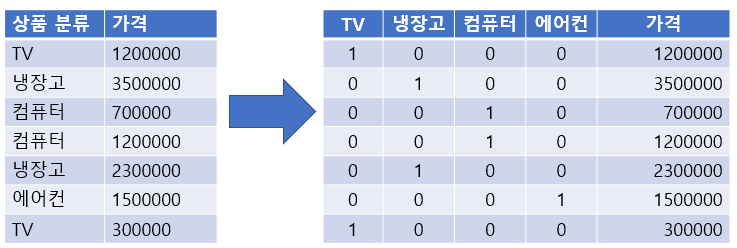


### One-Hot Encoding 변환 처리

-   **sklearn.preprocessing.OneHotEncoder**
    -   fit(데이터셋): 데이터셋을 기준으로 어떻게 변환할 지 학습
    -   transform(데이터셋): Argument로 받은 데이터셋을 원핫인코딩 처리
    -   fit_transform(데이터셋): 학습과 변환을 한번에 처리
    -   **get_feature_names_out()** : 원핫인코딩으로 변환된 Feature(컬럼)들의 이름을 반환
    -   **데이터셋은 2차원 배열을 전달 하며 Feature별로 원핫인코딩 처리한다.**
        -   DataFrame도 가능
        -   원핫인코딩 처리시 모든 타입의 값들을 다 변환한다. (연속형 값들도 변환) 그래서 변환려는 변수들만 모아서 처리해야 한다.


> OneHotEncoder객체 생성시 sparse 매개변수의 값을 False로 설정하지 않으면 scipy의 csr_matrix(희소행렬 객체)로 반환.  
> 희소행렬은 대부분 0으로 구성된 행렬과 계산이나 메모리 효율을 이용해 0이 아닌 값의 index만 관리한다.  
> csr_matrix.toarray()로 ndarray로 바꿀수 있다.


In [ ]:
import numpy as np
# 원핫 인코딩은 열 단위로 처리하므로 2차원 형태의 자료구조를 입력한다.
items=np.array([['TV'],['냉장고'],['전자렌지'],['컴퓨터'],['선풍기'],['선풍기'],['믹서'],['믹서']])
print(np.shape(items)) # items.shape
items  

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# 객체 생성
ohe = OneHotEncoder()
# 학습 - 어떻게 바꿀지 학습.
ohe.fit(items)
# 변환
result = ohe.transform(items)
# ohe.fit_transform(items)

In [ ]:
print(type(result))
result

In [ ]:
print(result)

In [ ]:
result.toarray() # ndarray로 변환.

In [ ]:
ohe.get_feature_names_out()
# one hot encoding된 각 열(컬럼)이 어떤 class(고유값)을 나타내는지 조회.

In [ ]:
## 학습대상과 변환대상이 같은 경우 - fit_transform()
ohe2 = OneHotEncoder(sparse_output=False)  # ndarray로 결과를 반환.
result2  = ohe2.fit_transform(items)
result2

### adult dataset - one-hot encoding 적용
#### 데이터셋 소개
-   Adult 데이터셋은 1994년 인구조사 데이터 베이스에서 추출한 미국 성인의 소득 데이터셋.
-   target 은 income 이며 수입이 $50,000 이하인지 초과인지 두개의 class를 가진다.
-   https://archive.ics.uci.edu/ml/datasets/adult

#### 처리
-   범주형 컬럼을 원핫인코딩 처리한다.
-   범주형 Feature중 **income은 출력 데이터이므로 Label Encoding 처리**를 한 뒤 y로 뺀다.

In [3]:
import pandas as pd
import numpy as np

In [4]:
cols = ['age', 'workclass','fnlwgt','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender','capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
category_columns = ['workclass','education','marital-status', 'occupation','relationship','race','gender','native-country', 'income']
number_columns = ['age','fnlwgt', 'education-num','capital-gain','capital-loss','hours-per-week']

##### 데이터 로딩


- ㅁㅁㅁ, ㄷㄷㄷ, ...
- 이런 식으로 '공백'을 가독성을 위해 넣음
- => 공백을 제거하고 데이터를 읽어들여야 한다. 

In [5]:
import pandas as pd

data = pd.read_csv(
    'data/adult.data', 
    header=None,      # 첫번째 라인부터 데이터일 경우.
    names=cols,       # header(컬럼명) 지정
    na_values='?',    # 결측치로 읽을 값 설정.
    skipinitialspace=True # 값 앞의 공백을 제거하고 읽는다. , abc -> ' abc', 'abc'
)
data.shape

(32561, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [8]:
### 결측치 있는 범주형 값들 조회
data['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [9]:
data['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [10]:
data['native-country'].value_counts()

native-country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [28]:
### 결측치 처리 - 최빈값으로 대체
from sklearn.impute import SimpleImputer
df = data.copy()

imputer = SimpleImputer(strategy="most_frequent")
df[['workclass', 'occupation', 'native-country']] = imputer.fit_transform(df[['workclass', 'occupation', 'native-country']])
# 세 개의 컬럼을 imputer에 넣어 fit and transform
df.isnull().sum() # 결측치가 사라짐. 최빈값으로 다 채워 넣었기 때문이다. 

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [29]:
#### 결측치 처리한 DataFrame 저장
df.to_csv('data/adult_imputer.csv', index=False)

In [16]:
#### 제거 (행단위)
data.isnull().sum()
drop_df = data.dropna()
drop_df.reset_index(drop=True, inplace=True) # index name 정리
data.shape, drop_df.shape

drop_df.to_csv("data/adult_dropna.csv", index=False)

#### encoding 처리


In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# income: label encoding
le = LabelEncoder()
y = le.fit_transform(df['income'])
np.unique(y, return_counts=True)

(array([0, 1]), array([24720,  7841]))

In [30]:
X = df.drop(columns='income')

In [33]:
ohe = OneHotEncoder()
cate = ohe.fit_transform(X[category_columns[:-1]]) # 맨 마지막 열에 있는 income(y)를 뺀다
# cate = ohe.fit_transform(df) 모든 컬럼을 다 넣는다면? -> ohe는 데이터가 범주형인지 연속형인지 구분하지 못함
# 따라서 범주형 컬럼만 넣어줘야 한다. ohe가 알아서 하지 않는다. ㅠ ㅠ

In [35]:
cate.shape
# 원래 범주형 컬럼은 9개였는데, 원-핫 벡터화 해서 99개로 늘어난 거다!

(32561, 99)

In [24]:
cate.toarray()
cate.toarray()[0] # 첫번째 원소

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])

In [26]:
ohe.get_feature_names_out() # 뭘 바꾼 건데? -> get_feature_names_out
# workclass_Federal-gov: 0, workclass_Local-gov: 0, ...

array(['workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_10th',
       'education_11th', 'education_12th', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-married', 'marital-status_Separated',
       'marital-status_Widowed', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'o

In [37]:
# ohe hot encoding 결과 + number 타입 컬럼 
## Series/DataFrame.values : ndarray 변환
X = np.concatenate([cate.toarray(), df[number_columns].values], axis=1)
# df[number_columns]는 nparray가 아니니까 .values을 써서 넘파이 배열로 바꾸는 거다. 
X.shape

(32561, 105)

#### 모델링

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression # 선형 계열 모델
from sklearn.metrics import accuracy_score

In [39]:
# train / validation / test set 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)
X_train.shape, X_valid.shape, X_test.shape

((19536, 105), (6512, 105), (6513, 105))

In [40]:
# 모델 학습: 모델: DecisionTreeClassifier (max_depth, random_state=고정), 평가지표: accuracy
## 모델 생성
tree = DecisionTreeClassifier(max_depth=3, random_state=0)

## fit() - train set
tree.fit(X_train, y_train)

## 검증 - validation set
pred_train = tree.predict(X_train)
pred_val = tree.predict(X_valid)

train_acc = accuracy_score(y_train, pred_train)
val_acc = accuracy_score(y_valid, pred_val)

print(f"train set accuracy: {train_acc}")
print(f"validation set  accuracy: {val_acc}")

train set accuracy: 0.8462837837837838
validation set  accuracy: 0.8416769041769042


In [41]:
# 최종 평가 - test set

pred_test = tree.predict(X_test)
test_acc = accuracy_score(y_test, pred_test)
print(f'test set 정확도: {test_acc}')

test set 정확도: 0.8387839705204975


# 수치형 데이터 전처리

-   연속형 데이터는 변수가 가지는 값들이 연속된 값인 경우로 보통 정해진 범위 안의 모든 실수가 값이 될 수 있다.

## Feature Scaling(정규화)

-   각 피처들간의 값의 범위(척도-Scale)가 다를 경우 이 값의 범위를 일정한 범위로 맞추는 작업
-   트리계열을 제외한 대부분의 머신러닝 알고리즘들이 Feature간의 서로 다른 척도(Scale)에 영향을 받는다.
    -   선형모델, SVM 모델, 신경망 모델
-   **Scaling(정규화)은 train set으로 fitting 한다. test set이나 예측할 새로운 데이터는 train set으로 fitting한 것으로 변환한다.**
    -   Train Set으로 학습한 scaler를 이용해 Train/Validation/Test set들을 변환한다.
    - (질문) train, val, test 데이터 전체를 이용해 min max 하면 되는 거 아닌가요?: train, val, test 전체로 0 ~ 1 값으로 변환한다면, 범위 밖의 데이터가 들어왔을 때 대처를 못 할 수도 있다. train으로만 min max해서 0 ~ 1로 변환하고, val을 이용해 예상 밖 범위 데이터를 한 번 대처해본 후 -> test data를 시험하면: val에서 범위 밖 데이터를 처리해 본 경험이 있기에 test data를 좀 더 처리할 수 있다.


### 종류

-   표준화(Standardization) Scaling
    -   StandardScaler 사용
-   Min Max Scaling
    -   MinMaxScaler 사용


### 메소드

-   fit(): 어떻게 변환할 지 학습
    -   2차원 배열을 받으면 0축을 기준으로 학습한다. (DataFrame으로는 컬럼기준)
-   transform(): 변환
    -   2차원 배열을 받으며 0축을 기준으로 변환한다. (DataFrame으로는 컬럼기준)
-   fit_transform(): 학습과 변환을 한번에 처리
-   inverse_transform(): 변환된 값을 원래값으로 복원


## 표준화(StandardScaler)

-   피쳐의 값들이 평균이 0이고 표준편차가 1인 범위에 있도록 변환한다.
    -   0을 기준으로 모든 데이터들이 모여있게 된다

\begin{align}
&New\,x_i = \cfrac{X_i-\mu}{\sigma}\\
&\mu-평균,\; \sigma-표준편차
\end{align}

-   **sklearn.preprocessing.StandardScaler** 를 이용


In [42]:
import numpy as np
data = np.array([[10], [2], [30]])  # ndarray 생성.
print(data.shape)
data

(3, 1)


array([[10],
       [ 2],
       [30]])

In [43]:
# 평균, 표준편차 계산
m = data.mean() # 평균
s = data.std()  # 표준편차
print(m, s, sep=" --- ")

14.0 --- 11.775681155103795


In [45]:
# Standard Scaling
result = (data - m)/s # 표준화
result

array([[-0.33968311],
       [-1.01904933],
       [ 1.35873244]])

In [46]:
print(result.mean(), result.std())

0.0 1.0


위 아래 두 코드의 동작은 동일하다. 

In [47]:
from sklearn.preprocessing import StandardScaler
# 객체 생성
s_scaler = StandardScaler()
# 어떻게 변환할지 학습 
s_scaler.fit(data) # feature별 평균과 표준편차 계산
result2 = s_scaler.transform(data)
# result3 = s_scaler.fit_transform(data) # 학습/변환 대상이 같은 경우.
result2

array([[-0.33968311],
       [-1.01904933],
       [ 1.35873244]])

## MinMaxScaler

-   데이터셋의 모든 값을 0(Min value)과 1(Max value) 사이의 값으로 변환한다.
    $$
    New\,x_i = \cfrac{x_i - min(X)}{max(X) - min(X)}
    $$


##### 예제


In [48]:
data = np.array([[10], [2], [30]])
data

array([[10],
       [ 2],
       [30]])

In [49]:
minimum = data.min() #axis=0)
maximum = data.max()
print(minimum, maximum)

2 30


In [50]:
# 변환
result = (data - minimum) / (maximum - minimum)
result

array([[0.28571429],
       [0.        ],
       [1.        ]])

In [53]:
from sklearn.preprocessing import MinMaxScaler

# 객체 생성
mm_scaler = MinMaxScaler()
# 학습
mm_scaler.fit(data) # feature별로 min/max 값 계산
# 변환
result2 = mm_scaler.transform(data)
# result3 = mm_scaler.fit_transform(data)  # 학습/변환 대상이 같은 경우.
result2

array([[0.28571429],
       [0.        ],
       [1.        ]])

In [54]:
mm_scaler.inverse_transform(result2) # 원래 상태로 되돌린다. 

array([[10.],
       [ 2.],
       [30.]])

In [55]:
mm_scaler.inverse_transform([[0.1], [0.8], [.4]]) # 원래 상태로 되돌린다. 

array([[ 4.8],
       [24.4],
       [13.2]])

전처리 - fit()을 할 때는 전체 데이터 셋으로 하는 게 아니다. **train dataset**으로 하는 거다! train dataset으로 하고, 그걸로 val, test에 적용시키는 거다. 물론 전체로 해도 되지만.. 모델이 학습할 때는 train set으로 하고, val과 test는 평가할 때 쓰는 거니까. 학습은 val, test로 안 하면서 전처리 할 때는 쓰면 안 되겠죠? = data leak (데이터 누수)

## 위스콘신 유방암 데이터셋으로 Scaling

-   위스콘신 대학교에서 제공한 유방암 진단결과 데이터
    -   https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original
-   Feature: 종양 측정값들
    -   모든 Feature들은 **연속형(continous)** 이다.
-   target: 악성, 양성 여부
-   scikit-learn 패키지에서 toy dataset으로 제공한다.
    -   load_breast_cancer() 함수 이용


### 데이터 로딩 및 전처리

In [56]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
feature = data['data']   # 속성 - 종양 검사 기록
target = data['target']   # 타겟 - 악성/양성 종양 여부.

feature.shape, target.shape

((569, 30), (569,))

In [57]:
data['feature_names']
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [58]:
feature[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [59]:
# 평균, 표준편차
feature.mean(axis=0)

array([1.41272917e+01, 1.92896485e+01, 9.19690334e+01, 6.54889104e+02,
       9.63602812e-02, 1.04340984e-01, 8.87993158e-02, 4.89191459e-02,
       1.81161863e-01, 6.27976098e-02, 4.05172056e-01, 1.21685343e+00,
       2.86605923e+00, 4.03370791e+01, 7.04097891e-03, 2.54781388e-02,
       3.18937163e-02, 1.17961371e-02, 2.05422988e-02, 3.79490387e-03,
       1.62691898e+01, 2.56772232e+01, 1.07261213e+02, 8.80583128e+02,
       1.32368594e-01, 2.54265044e-01, 2.72188483e-01, 1.14606223e-01,
       2.90075571e-01, 8.39458172e-02])

In [60]:
feature.std(axis=0)

array([3.52095076e+00, 4.29725464e+00, 2.42776193e+01, 3.51604754e+02,
       1.40517641e-02, 5.27663291e-02, 7.96497253e-02, 3.87687325e-02,
       2.73901809e-02, 7.05415588e-03, 2.77068942e-01, 5.51163427e-01,
       2.02007710e+00, 4.54510134e+01, 2.99987837e-03, 1.78924359e-02,
       3.01595231e-02, 6.16486075e-03, 8.25910439e-03, 2.64374475e-03,
       4.82899258e+00, 6.14085432e+00, 3.35730016e+01, 5.68856459e+02,
       2.28123569e-02, 1.57198171e-01, 2.08440875e-01, 6.56745545e-02,
       6.18130785e-02, 1.80453893e-02])

In [61]:
s_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
result = s_scaler.fit_transform(feature)
result2 = mm_scaler.fit_transform(feature)
result2[:5]

array([[0.52103744, 0.0226581 , 0.54598853, 0.36373277, 0.59375282,
        0.7920373 , 0.70313964, 0.73111332, 0.68636364, 0.60551811,
        0.35614702, 0.12046941, 0.3690336 , 0.27381126, 0.15929565,
        0.35139844, 0.13568182, 0.30062512, 0.31164518, 0.18304244,
        0.62077552, 0.14152452, 0.66831017, 0.45069799, 0.60113584,
        0.61929156, 0.56861022, 0.91202749, 0.59846245, 0.41886396],
       [0.64314449, 0.27257355, 0.61578329, 0.50159067, 0.28987993,
        0.18176799, 0.20360825, 0.34875746, 0.37979798, 0.14132266,
        0.15643672, 0.08258929, 0.12444047, 0.12565979, 0.11938675,
        0.08132304, 0.0469697 , 0.25383595, 0.08453875, 0.0911101 ,
        0.60690146, 0.30357143, 0.53981772, 0.43521431, 0.34755332,
        0.15456336, 0.19297125, 0.63917526, 0.23358959, 0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, 0.44941676, 0.51430893,
        0.4310165 , 0.46251172, 0.63568588, 0.50959596, 0.21124684,
        0.22962158, 0.09430251, 0.18037035, 0.

In [66]:
result[0]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

In [62]:
result.mean(axis=0)

array([-3.16286735e-15, -6.53060890e-15, -7.07889127e-16, -8.79983452e-16,
        6.13217737e-15, -1.12036918e-15, -4.42138027e-16,  9.73249991e-16,
       -1.97167024e-15, -1.45363120e-15, -9.07641468e-16, -8.85349205e-16,
        1.77367396e-15, -8.29155139e-16, -7.54180940e-16, -3.92187747e-16,
        7.91789988e-16, -2.73946068e-16, -3.10823423e-16, -3.36676596e-16,
       -2.33322442e-15,  1.76367415e-15, -1.19802625e-15,  5.04966114e-16,
       -5.21317026e-15, -2.17478837e-15,  6.85645643e-16, -1.41265636e-16,
       -2.28956670e-15,  2.57517109e-15])

In [63]:
result.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [64]:
result2.min(axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [65]:
result2.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### 모델링

In [67]:
# train set/test set/validation set
from sklearn.model_selection import train_test_split

# fit() -> trainset
# transform() -> train/valid/test set (trainset으로 학습한 Scalar 객체를 이용한다. )

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, stratify=target, 
                                                    random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, 
                                                      random_state=0)

X_train.shape, X_valid.shape, X_test.shape

((364, 30), (91, 30), (114, 30))

In [68]:
##### Standard Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train) # 1. 먼저 train dataset으로 fit과 transform을 해준다. 
X_valid_scaled1 = scaler.transform(X_valid) # 2. 그 다음 valid와 test dataset은 transform만 해준다!
X_test_scaled1 = scaler.transform(X_test)

print(X_train_scaled1.mean(axis=0), X_train_scaled1.std(axis=0)) # y 값은 정답 값이니까 fit 해주지 않는다!
print(X_valid_scaled1.mean(axis=0), X_valid_scaled1.std(axis=0))
print(X_test_scaled1.mean(axis=0), X_test_scaled1.std(axis=0))

[-2.57349087e-15 -1.32921757e-15 -6.43105837e-16  2.44310067e-16
 -8.97938622e-16  4.88620133e-16  4.11148527e-16 -5.05395481e-16
 -1.67997484e-15  2.69198583e-15 -3.18807862e-16  8.82688306e-16
 -4.05810916e-16  6.43563347e-16  7.83179992e-16 -3.52434809e-16
  5.37573649e-16 -8.97824245e-16 -1.95623432e-15  1.57078258e-16
 -2.40116230e-16 -7.12189770e-17 -1.59483995e-15  1.17412185e-15
  5.79512018e-15  1.85504847e-15  2.56205313e-17 -3.49232243e-16
  5.84392120e-16 -1.46769044e-15] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[-0.04530476  0.06442814 -0.04763283 -0.04718105  0.0491703  -0.00465532
 -0.04430904 -0.00228626  0.1440289   0.03409771  0.11236541  0.01312549
  0.11299126  0.09671882  0.133951   -0.00739747 -0.05742507  0.02280448
  0.04359547  0.06701324 -0.02866774 -0.0063776  -0.02648608 -0.03962948
  0.0723013  -0.01883656 -0.0728466  -0.01860934  0.00212971  0.03249858] [0.96981196 1.13202563 0.96287472 0.97321049 0.92786

In [69]:
## Min Max Scaling

m_scaler = MinMaxScaler()
X_train_scaled2 = m_scaler.fit_transform(X_train) 
X_valid_scaled2 = m_scaler.transform(X_valid)
X_test_scaled2 = m_scaler.transform(X_test)

print(X_train_scaled2.min(axis=0), X_train_scaled2.max(axis=0))
print(X_valid_scaled2.min(axis=0), X_valid_scaled2.max(axis=0))
print(X_test_scaled2.min(axis=0), X_test_scaled2.max(axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[0.04460439 0.06514523 0.0475608  0.02183987 0.18026038 0.05751181
 0.         0.         0.14242424 0.01221567 0.00119072 0.00594501
 0.00921589 0.00084423 0.03824319 0.02523508 0.         0.
 0.05006473 0.01355823 0.02905489 0.05810235 0.04478674 0.01290195
 0.13775342 0.04187303 0.         0.         0.01636113 0.00178026] [1.0349739  1.22697095 1.01151245 0.99914185 0.89985535 0.79019692
 0.93606819 0.83376895 0.85       0.96440607 1.13385342 0.70893741
 1.1861063  0.96899503 0.68181664 0.60622766 0.29262673 1.04150751
 0.56210953 0.56786719 0.80666618 0.87553305 0.73717655 0.72434498
 0.85471835 0.92334809 0.74976038 0.91284878 0.55450424 0.68972533]
[-0.03598763  0.10207469 -0.02971651 -0.01154209  0.15021698  0.02183915
  0.          0.          0.0540404   0.00610783  0.01576678  0.00837606
  0.

In [70]:
# 모델 학습
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [71]:
######## scaling 안한 데이터로 학습
svc1 = SVC(C=0.1, gamma=0.1, random_state=0)
# svc1 = SVC(random_state=0)

svc1.fit(X_train, y_train)

pred_train1 = svc1.predict(X_train)
pred_valid1 = svc1.predict(X_valid)
pred_test1 = svc1.predict(X_test)

print(accuracy_score(y_train, pred_train1))
print(accuracy_score(y_valid, pred_valid1))
print(accuracy_score(y_test, pred_test1))

0.6263736263736264
0.6263736263736264
0.631578947368421


In [75]:
##### Standard Scaling 한 데이터로 모델링
svc2 = SVC(C=0.1, gamma=0.1, random_state=0) # C, gamma: hyper parameter
# svc2 = SVC(random_state=0)

svc2.fit(X_train_scaled1, y_train)

pred_train2 = svc2.predict(X_train_scaled1) # fit할 때와 같이 scaling 된 데이터를 넣어야 함!! X_train 넣으면 안 돼!
pred_valid2 = svc2.predict(X_valid_scaled1)
pred_test2 = svc2.predict(X_test_scaled1)

print(accuracy_score(y_train, pred_train2))
print(accuracy_score(y_valid, pred_valid2))
print(accuracy_score(y_test, pred_test2))

0.9560439560439561
0.9340659340659341
0.9122807017543859


In [73]:
### Min Max Scaling
svc3 = SVC(C=0.1, gamma=0.1, random_state=0)
# svc3 = SVC(random_state=0)

svc3.fit(X_train_scaled2, y_train)

pred_train3 = svc3.predict(X_train_scaled2)
pred_valid3 = svc3.predict(X_valid_scaled2)
pred_test3 = svc3.predict(X_test_scaled2)

print(accuracy_score(y_train, pred_train3))
print(accuracy_score(y_valid, pred_valid3))
print(accuracy_score(y_test, pred_test3))

0.9175824175824175
0.9010989010989011
0.8859649122807017


minmax scale, standard scale 둘 중 뭘 해야 할까요? -> 둘 다 해보고 성능이 더 좋을 걸 쓰면 된다. 데이터가 정규분포를 따르는 경우 standard scaling이 더 좋을 거다.. 둘 중 하나를 추천한다면 standard로 하자 (강사님 피셜)

# 모델 저장 -> pickle

- 전처리 객체, 모델 객체 모두 저장한다.

In [83]:
import os
# 저장할 경로 생성
save_dir = "saved_model/wisconsin_breast_cancer" # /나 \\ 쳐도 상관 없다. os가 알아서 처리한다. /가 편하겠죠? 역슬러시는 두 번 쳐야 하니까
os.makedirs(save_dir, exist_ok=True) # default: exist_ok=False: 이미 있는 파일이면 에러

# 상위 디렉토리가 같아서 os로 상위 디렉토리 아래 경로를 쳐주는 거임
scaler_path = os.path.join(save_dir, 'standard_scaler.pkl') # "saved_model/wisconsin_breast_cancer/standard_scaler.pkl"
model_path = os.path.join(save_dir, 'svm_model.pkl')
print(scaler_path, model_path)

saved_model/wisconsin_breast_cancer\standard_scaler.pkl saved_model/wisconsin_breast_cancer\svm_model.pkl


In [81]:
# 참고: os는 경로를 생성한다.
import os
os.path.join("a", "b", "c")

'a\\b\\c'

In [84]:
### Scaler 저장
import pickle

with open(scaler_path, 'wb') as fw_scaler:
    pickle.dump(scaler, fw_scaler)  # StandardScaler 학습

In [85]:
### 모델 저장
with open(model_path, 'wb') as fw_model:
    pickle.dump(svc2, fw_model)

In [86]:
# Scaler 모델 불러오기
with open(scaler_path, 'rb') as fr_scaler:
    saved_scaler = pickle.load(fr_scaler)
    
with open(model_path, 'rb') as fr_model:
    saved_svc = pickle.load(fr_model)

In [87]:
x_test_scaled = saved_scaler.transform(X_test)
result = saved_svc.predict(x_test_scaled)
accuracy_score(y_test, result)

0.9122807017543859